# Assignment Questions 
---

<br></br>
## 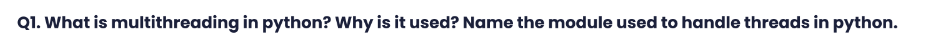

`multithreading` : it's a technique where we create multiple thread in a single process to break individual task into small piceses or threads and run those threads simultaneously.

<br></br>
we use multithreading to :
- break a process into it's small individual tasks and run it on different threads separated from MainThread the programme currently running
- maximize the utilization of system resorces
- increase performance and minimize latancy, etc

<br></br>
we use `threading` module to handle threads in python

---

In [1]:
import threading

<br></br>
## 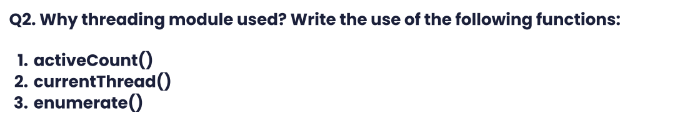

`activeCount()` : returns the number of threads currently active in the programme

In [2]:
threading.activeCount()

6

<br></br>
`currentThread()` : returns the currently executing thread object

In [3]:
threading.currentThread()

<_MainThread(MainThread, started 23780)>

<br></br>
`enumerate()` : returns the lists of all currently active threads

In [4]:
threading.enumerate()

[<_MainThread(MainThread, started 23780)>,
 <Thread(Thread-6, started daemon 7220)>,
 <Heartbeat(Thread-7, started daemon 15196)>,
 <ControlThread(Thread-5, started daemon 14400)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 23440)>,
 <ParentPollerWindows(Thread-4, started daemon 18168)>]

---
<br></br>
## 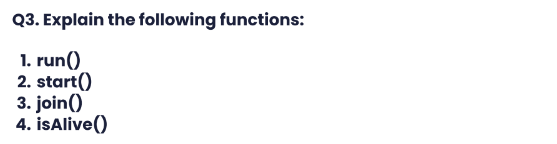

`run()` : method representing the thread's activity. can be over write in Thread subclass

`start()` : used to execute new thread

`join()` : waits for the thread to terminate

`isAlive()` : checks if a thread is still executing

---
<br></br>
## 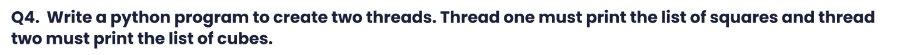

In [9]:
def squares( nums ) :
    res = [ i*i for i in nums]
    print(res)

def cubes( nums ) :
    res = [ i**3 for i in nums ]
    print(res)


In [10]:
l = [1, 2, 3, 4, 5, 6]

In [11]:
t1 = threading.Thread(target=squares, args=(l,))
t2 = threading.Thread(target=cubes, args=(l,))

In [12]:
t1.start()
t2.start()

[1, 4, 9, 16, 25, 36]
[1, 8, 27, 64, 125, 216]


---
<br></br>
## 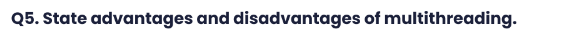

`advantages` : 
- multithreading can increase the performance of our program by utilizing multiple threads.
- we can maximize system resource utilization by running multiple threads
- help us to create more modular code by allowing to divide complex tasks into smaller, more manageable threads
- help us to reduce the latency of our program by allowing us to execute tasks that can take lot's of time, such as waiting for fetching data from urls.

`disadvantages` :
- using too much multi-threading lead to consume more system resorces and reduce scalability of our programme
- using too much makes difficult to control execution order and hard to maintain
- when multiple threads are accessing shared resources, it can lead to race conditions
- deadlocks can occur when multiple threads are waiting for each other to release a resource

---
<br></br>
## 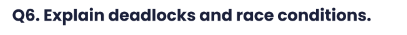

`race conditions` : it occours when 2 or more threads use a shared resorce and each threads competeting over to gain access that shared resorce and modify it. in such condition those threads interfere to each other and output become more unpredictable. It may or may not occoure

In [13]:
from threading import Thread

num = 0

def increment() :
    global num
    num += 1

In [25]:
    
threads = [ Thread(target=increment) for _ in range(1000) ]
for t in threads : t.start()
for t in threads : t.join()
    
num

4000

on above code all threads try to access and modify global 'num' variable/resorce. some time it may occoure where many threads competeting to modify it. after complete execution of programme num should be 1000 if race conditions not occoure

<br></br>
`deadlocks` : when 2 or more threads are waiting for each other to release a resource that they need in order to execute.

In [17]:
from threading import Lock, Thread
from time import sleep


res_1 = Lock()
res_2 = Lock()



def test_1() :
    res_1.acquire()
    print('Thread 1 acquire res_1')
    sleep(1) # taking some time to compute
    
    res_2.acquire()
    print('Thread 1 acquire res_2')
    
    lock_1.release()
    lock_2.release()
    
    
def test_2() :
    res_2.acquire()
    print('Thread 2 acquire res_2')
    sleep(1) # taking some time to compute
    
    res_1.acquire()
    print('Thread 2 acquire res_1')
    
    lock_2.release()
    lock_1.release()

In [18]:
thread_1 = Thread(target=test_1)
thread_2 = Thread(target=test_2)

In [ ]:
thread_1.start()
thread_2.start()

thread_1.join()
thread_2.join()

Thread 1 acquire res_1
Thread 2 acquire res_2


>


on above code theres a deadlock between thread 't1' and thread 't2'.

'thread_1' and 'thread_2' threads starts almost same time and acquire 'res_1' and 'res_2' respectively. now they got stuck waiting for each other to release the other resorces to complete their execution.

---